In [1]:
import os
import sys

from pathlib import Path

# Get the current working directory
cwd = Path(os.getcwd())

# Assuming your notebook is in the project root, set the project root as cwd
project_root = cwd.parent
print(project_root)

# If your notebook is in a subdirectory of the project root, you can modify the path accordingly:
# project_root = cwd.parent  # Go up one directory level
# project_root = cwd.parent.parent  # Go up two directory levels

# Add the project root directory to sys.path
sys.path.insert(0, str(project_root))
# sys.path.append('../')

import warnings
import corr_fitter.bs_utils as bs
import corr_fitter.bs_analysis as bs_analysis
import corr_fitter.load_data_priors as ld
import corr_fitter.corr_fit_analysis as fa
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
import h5py as h5
import importlib
import numpy as np
import gvar as gv
import pandas as pd

warnings.simplefilter(action="default")
warnings.filterwarnings('ignore')


/home/gmoney/lqcd


In [2]:
# Define paths and other variables
base_dir = "/home/gmoney/lqcd/corr_fitter"
input_dir = os.path.join(base_dir, "tests/input_files")
data_dir = os.path.join(base_dir, "data")
fit_results_dir = os.path.join(base_dir, "fit_results")
data_file = '/home/gmoney/lqcd/data/c51_2pt_octet_decuplet.h5'
hyperon_data_file = os.path.join(data_dir,"hyperon_data.h5")
bs_data_file = os.path.join(data_dir, "hyperon_bs_data.h5")
model_type = "all"
t_plot_min = 0
t_plot_max = 40
bs_N = 100
bs_seed = "seed"

Least Square Fit:
  chi2/dof [dof] = 0.72 [196]    Q = 1    logGBF = 5917.2

Parameters:
     proton_z_PS 0    3.55(23)e-08      [ 0.00000 (33) ]  
                 1    2.5(2.4)e-07      [ 0.00000 (33) ]  
     proton_z_SS 0   1.540(97)e-08      [ 4.4(4.4)e-06 ]  
                 1    8.6(7.9)e-08      [ 4.4(4.4)e-06 ]  
      delta_z_PS 0    6.5(1.5)e-08      [ 0.00000 (33) ]  
                 1    5.0(1.3)e-07      [ 0.00000 (33) ]  
      delta_z_SS 0    3.32(74)e-08      [ 4.4(4.4)e-06 ]  
                 1    2.09(47)e-07      [ 4.4(4.4)e-06 ]  
   sigma_st_z_PS 0    3.14(35)e-08      [ 0.00000 (33) ]  
                 1    2.14(34)e-07      [ 0.00000 (33) ]  
   sigma_st_z_SS 0    1.58(17)e-08      [ 0.00000 (33) ]  
                 1    8.7(1.2)e-08      [ 0.00000 (33) ]  
      sigma_z_PS 0    5.85(31)e-08      [ 0.00000 (33) ]  
                 1    2.49(72)e-07      [ 0.00000 (33) ]  
      sigma_z_SS 0    2.53(13)e-08      [ 0.00000 (33) ]  
                 1    8.8(

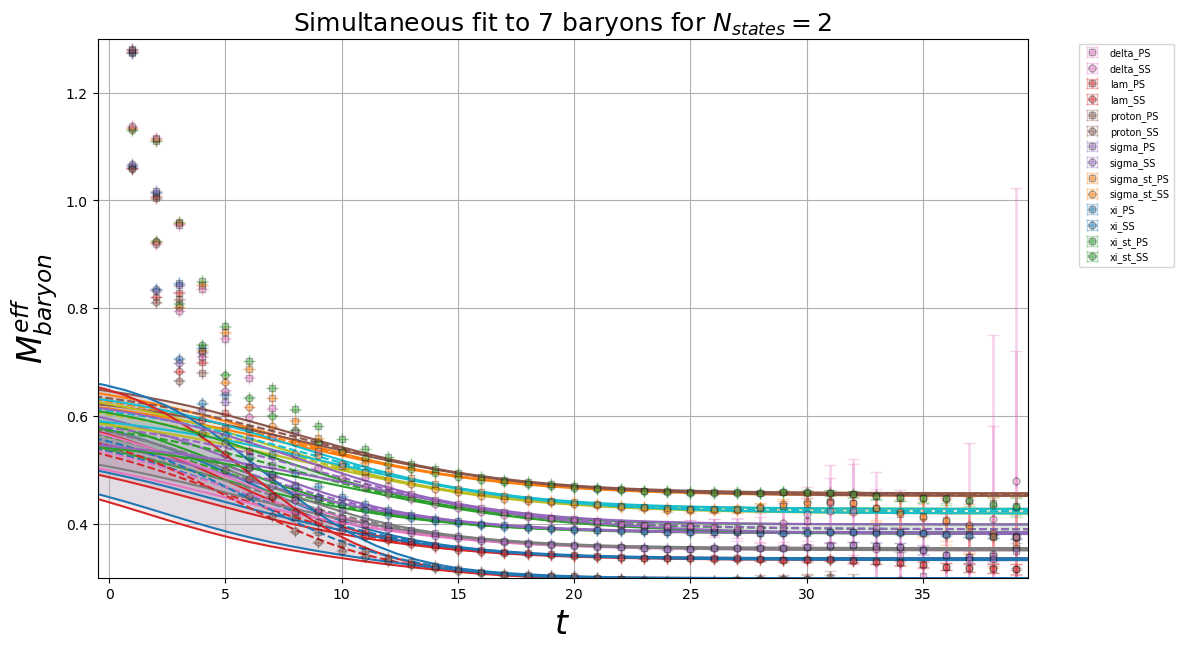

temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17) 0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17)
 0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17)
 0.3344(17) 0.3344(17)]
temp_fit.p[corr+'_E0']: 0.3344(17)
fit_data[n_state]['y']: [0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17) 0.3344(17)

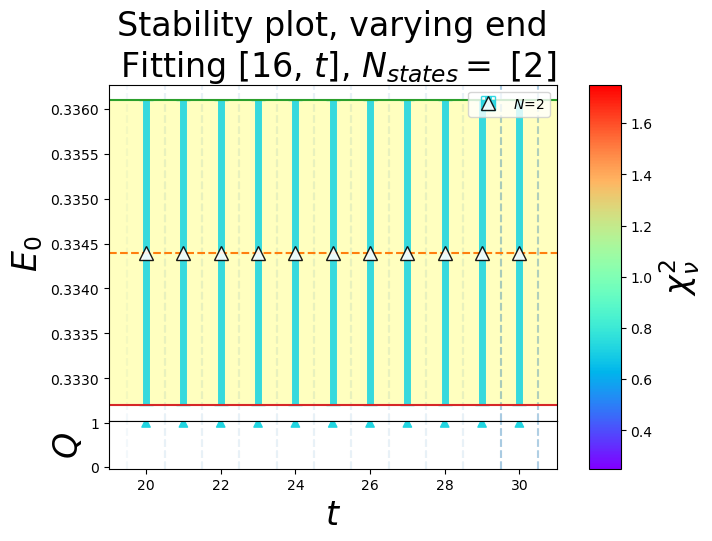

'0.2966(27) & 0.3832(11) & 0.3529(21) & 0.3344(17) & 0.4540(24) & 0.3897(92) & 0.4233(44) '

In [7]:
importlib.reload(fa)
from tabulate import tabulate
abbr = 'a06m220L'
fit_params = os.path.join(input_dir, f"{abbr}.py")
sys.path.append(os.path.dirname(os.path.abspath(fit_params)))
fp = importlib.import_module(fit_params.split('/')[-1].split('.py')[0])
p_dict = fp.p_dict
prior = fp.prior
corrs = {
        'lam': ld.get_raw_corr(data_file, p_dict['abbr'], particle='lambda_z'),
        'xi': ld.get_raw_corr(data_file, p_dict['abbr'], particle='xi_z'),
        'xi_st': ld.get_raw_corr(data_file, p_dict['abbr'], particle='xi_star_z'),
        'sigma': ld.get_raw_corr(data_file, p_dict['abbr'], particle='sigma_p'),
        'sigma_st': ld.get_raw_corr(data_file, p_dict['abbr'], particle='sigma_star_p'),
        'proton': ld.get_raw_corr(data_file, p_dict['abbr'], particle='proton'),
        'delta': ld.get_raw_corr(data_file,p_dict['abbr'],particle='delta_pp')
    }
hyperon_fit = fa.analyze_hyperon_corrs(data_file, fit_params, model_type=model_type,
                                               bs=False, bs_file=bs_data_file,
                                               bs_path=abbr, bs_N=bs_N, bs_seed=bs_seed)
   
hyperon_base_fit = fa.corr_fit_analysis(
    t_range=p_dict['t_range'],simult=True,t_period=64,
    states=p_dict['hyperons'],p_dict=p_dict, n_states=p_dict['n_states'],
    prior=prior, corr_gv = corrs,model_type=model_type)

my_fit = hyperon_fit.get_fit()
plot2 = hyperon_base_fit.plot_effective_mass(t_plot_min=t_plot_min, t_plot_max=t_plot_max, model_type=model_type,
                                           show_plot=True, show_fit=True)
plot3 = hyperon_base_fit.plot_stability(model_type=model_type,corr='lam')

from tabulate import tabulate

def generate_latex_line(hyperon_fit):
    ordered_keys = ['proton_E0', 'xi_E0', 'sigma_E0', 'lam_E0', 'xi_st_E0', 'delta_E0', 'sigma_st_E0']
    latex_line = ""

    for key in ordered_keys:
        if key in hyperon_fit.p:
            p = hyperon_fit.p[key]
            latex_line += f"{p} & "
        else:
            latex_line += "& "

    # Remove the last ampersand and space
    latex_line = latex_line[:-2]

    return latex_line


generate_latex_line(hyperon_fit=my_fit)


Least Square Fit:
  chi2/dof [dof] = 0.87 [140]    Q = 0.86    logGBF = 3331.7

Parameters:
   sigma_st_z_PS 0   4.680(87)e-06      [ 0.0(3.3)e-05 ]  
                 1       4(12)e-07      [ 0.0(3.3)e-05 ]  
   sigma_st_z_SS 0   2.252(36)e-07      [ 0.0(3.3)e-05 ]  
                 1    3.6(4.5)e-07      [ 0.0(3.3)e-05 ]  
      sigma_z_PS 0   5.070(85)e-06      [ 0.0(3.3)e-05 ]  
                 1       2(94)e-08      [ 0.0(3.3)e-05 ]  
      sigma_z_SS 0   1.915(31)e-07      [ 0.0(3.3)e-05 ]  
                 1    2.6(2.0)e-07      [ 0.0(3.3)e-05 ]  
        lam_z_PS 0    5.86(11)e-06      [ 0.0(3.3)e-05 ]  
                 1   0.000024 (25)      [ 0.0(3.3)e-05 ]  
        lam_z_SS 0   2.117(35)e-07      [ 4.4(4.4)e-06 ]  
                 1    3.0(3.3)e-06      [ 4.4(4.4)e-06 ]  
     proton_z_PS 0    5.4(1.1)e-06      [ 0.0(3.3)e-05 ]  
                 1    3.4(3.2)e-06      [ 0.0(3.3)e-05 ]  
     proton_z_SS 0    1.98(40)e-07      [ 0.0(3.3)e-05 ]  
                 1    1

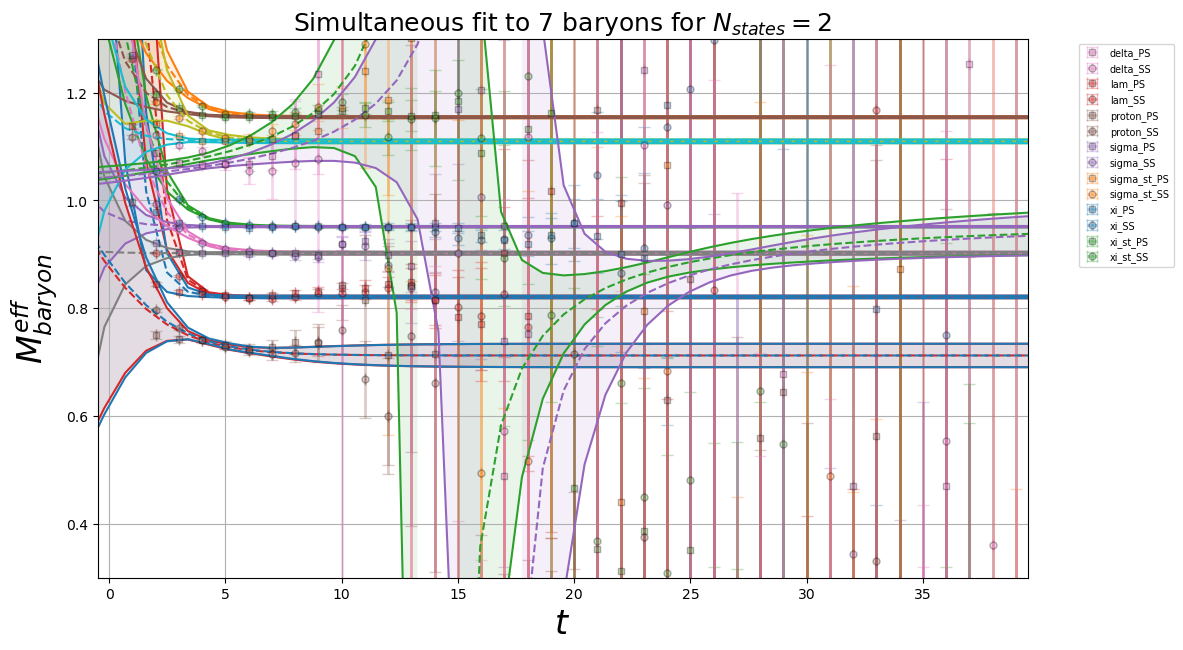

Abbreviation: a15m130
╒════╤═══════════════╤═══════════════╤════════════╤════════════╤══════════╤══════════╤═════════════╤═════════════╤════════════╤════════════╤════════════╤════════════╤═════════╤═════════╤══════════╤═══════════════╤════════╤═════════════╤═══════╤════════════╤══════════╤═══════════════╤═════════════╤══════════════════╤═══════════╤════════════════╤══════════╤═══════════════╕
│    │ 0             │ 1             │ 2          │ 3          │ 4        │ 5        │ 6           │ 7           │ 8          │ 9          │ 10         │ 11         │ 12      │ 13      │ 14       │ 15            │ 16     │ 17          │ 18    │ 19         │ 20       │ 21            │ 22          │ 23               │ 24        │ 25             │ 26       │ 27            │
╞════╪═══════════════╪═══════════════╪════════════╪════════════╪══════════╪══════════╪═════════════╪═════════════╪════════════╪════════════╪════════════╪════════════╪═════════╪═════════╪══════════╪═══════════════╪════════╪════════

KeyboardInterrupt: Interrupted by user

In [ ]:
from tabulate import tabulate

abbreviations = [f[:-3] for f in os.listdir(input_dir) if f.endswith('.py')]

for abbr in abbreviations:
    fit_params = os.path.join(input_dir, f"{abbr}.py")
    if not os.path.exists(fit_params):
        print(f"Error: input file {fit_params} does not exist!")
        continue

    with open(fit_params, 'r') as f:
        input_file_contents = f.read()

    if 'p_dict' not in input_file_contents:
        print(f"Error: input file {fit_params} does not contain a dictionary called 'p_dict'!")
        continue

    try:
        p_dict = {}
        exec(input_file_contents, p_dict)
    except Exception as e:
        print(f"Error: Failed to execute the contents of input file {fit_params}!\n{str(e)}")
        continue

    if 'tag' not in p_dict:
        print(f"Warning: input file {fit_params} does not contain a dictionary called 'tag' within the 'p_dict' dictionary! Adding default values...")
        p_dict['tag'] = {
            'sigma' : 'sigma',
            'sigma_st' : 'sigma_st',
            'xi' :  'xi',
            'xi_st' : 'xi_st',
            'lam' : 'lam',
        }

    try:
        hyperon_fit = fa.analyze_hyperon_corrs(data_file, fit_params, model_type=model_type,
                                               bs=False, bs_file=bs_data_file,
                                               bs_path=abbr, bs_N=bs_N, bs_seed=bs_seed)
    except KeyError:
        print(f"KeyError: Error analyzing hyperons for input file {fit_params}. Skipping abbreviation {abbr}.")
        continue

    my_fit = hyperon_fit.get_fit()

    out_path = os.path.join(fit_results_dir, abbr, model_type)
    ld.pickle_out(fit_out=my_fit, out_path=out_path, species="hyperons")
    plot1 = hyperon_fit.return_best_fit_info()
    plot2 = hyperon_fit.plot_effective_mass(t_plot_min=t_plot_min, t_plot_max=t_plot_max, model_type=model_type,
                                            show_plot=True, show_fit=True)

    output_dir = os.path.join(fit_results_dir, abbr, f"{model_type}_{abbr}")
    os.makedirs(output_dir, exist_ok=True)
    output_pdf = os.path.join(output_dir, 'output.pdf')
    with PdfPages(output_pdf) as pp:
        pp.savefig(plot1)
        pp.savefig(plot2)

    params_df = pd.DataFrame(my_fit.p).transpose()

    print("Abbreviation:", abbr)
    print(tabulate(params_df, headers='keys', tablefmt='fancy_grid'))

    # Ask the user if the fit result is acceptable
    while True:
        result = input(f"Is the fit result for abbreviation {abbr} acceptable? (y/n): ")
        if result == "y":
            # Save the result and skip this fit in future runs
            out_path = 'fit_results/{0}/{1}/'.format(abbr, model_type)
            ld.pickle_out(fit_out=my_fit, out_path=out_path, species="hyperons")
            break
        elif result == "n":
            break
